In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r'D:\MSC\sem 3\Marketing Analytics using AI\dataset_DF_data - dataset_DF_data.csv')

In [6]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'])

# Aggregate sales by date

df_daily_sales = df.groupby('date').sum().reset_index()

# Check the resulting dataframe
df_daily_sales.head()

,date,store,item,sales
0,2013-01-01,2750,12750,13696
1,2013-01-02,2750,12750,13678
2,2013-01-03,2750,12750,14488
3,2013-01-04,2750,12750,15677
4,2013-01-05,2750,12750,16237


In [9]:
df_daily_sales.set_index('date',inplace=True)

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
model = ARIMA(df_daily_sales['sales'], order=(10,1,0))  # Using ARIMA(5,1,0) for simplicity
model_fit = model.fit()

c:\Users\Sarthak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Sarthak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Sarthak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Sarthak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
# Forecast for the next 120 days
forecast = model_fit.forecast(steps=30)
print(forecast)

2018-01-01    18009.958371
2018-01-02    21122.098546
2018-01-03    20702.525979
2018-01-04    22123.009427
2018-01-05    23648.843337
2018-01-06    24997.748172
2018-01-07    26384.961045
2018-01-08    18181.996496
2018-01-09    21220.891286
2018-01-10    20793.082007
2018-01-11    22177.875478
2018-01-12    23625.524609
2018-01-13    24908.053413
2018-01-14    26277.649869
2018-01-15    18296.118430
2018-01-16    21277.954108
2018-01-17    20853.053930
2018-01-18    22210.868716
2018-01-19    23589.141736
2018-01-20    24812.023625
2018-01-21    26166.835170
2018-01-22    18402.643264
2018-01-23    21329.645949
2018-01-24    20908.526368
2018-01-25    22240.573952
2018-01-26    23552.768017
2018-01-27    24718.770390
2018-01-28    26058.895273
2018-01-29    18506.178423
2018-01-30    21379.206774
Freq: D, Name: predicted_mean, dtype: float64


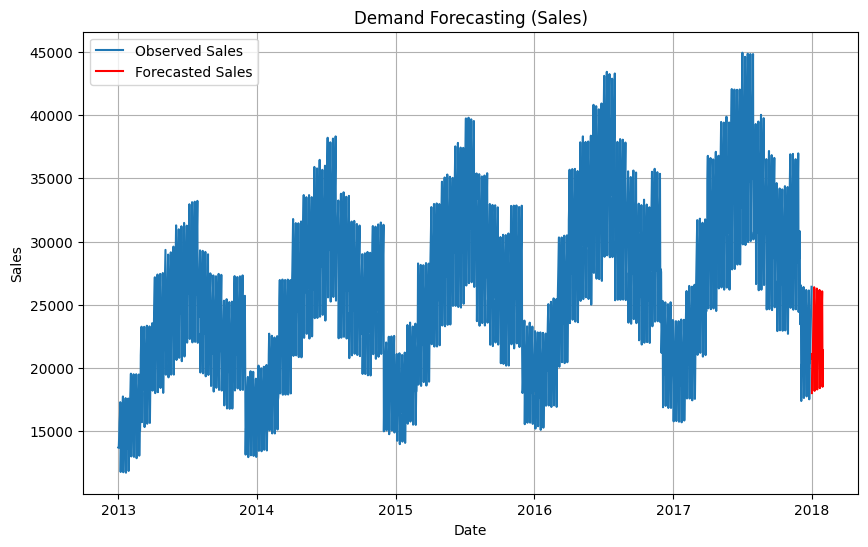

In [13]:
# Plot the original sales data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales['sales'], label='Observed Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Demand Forecasting (Sales)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

